In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from antea.io.mc_io import load_sns_positions

import invisible_cities.core.fit_functions as fitf
from invisible_cities.core.core_functions import shift_to_bin_centers

In [2]:
filename = '/Users/carmenromoluque/nexus_petit_analysis/full-body-phantom-paper/full_body_phantom_paper.0.h5'

sns_positions = load_sns_positions(filename)

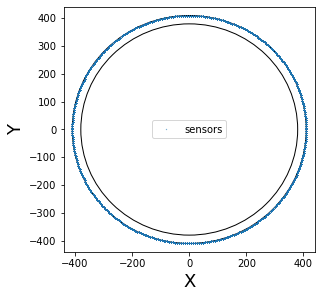

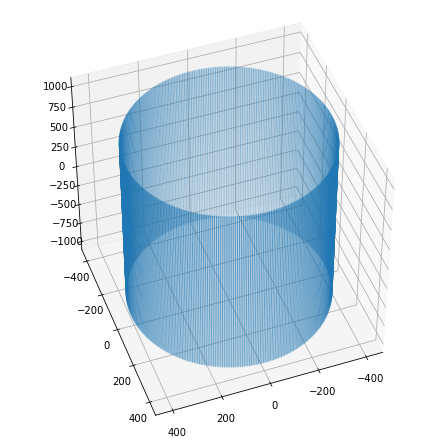

In [3]:
sens_pos_x = sns_positions.x.values #mm
sens_pos_y = sns_positions.y.values #mm
sens_pos_z = sns_positions.z.values #mm

## Define the ring
depth_ring = 30  #mm
r_int = 380 #mm
r_ext = r_int + depth_ring
center_point = (0., 0.)

## Define the figure
fig = plt.figure(figsize=(4.5,4.5))
limits = r_ext + 30
plt.xlim(-limits, limits)
plt.ylim(-limits, limits)
plt.xlabel('X', size=18)
plt.ylabel('Y', size=18)

circ1 = plt.Circle(center_point, r_int, color='k', fill=False)
circ2 = plt.Circle(center_point, r_ext, color='k', fill=False)

ax = fig.gca()
ax.add_artist(circ1)
ax.add_artist(circ2)

## Plot the sensors
plt.plot(sens_pos_x, sens_pos_y, '.', markersize=0.5,  label='sensors')
plt.legend()
plt.show()

fig = plt.figure(figsize=(6,6))
ax  = Axes3D(fig)
ax.scatter(sens_pos_x, sens_pos_y, sens_pos_z, marker='o', s=0.05)
ax.view_init(azim=70, elev=45)

In [4]:
eventsPath = '/Users/carmenromoluque/nexus_petit_analysis/full-body-phantom-paper/data_coincidences_paola/'

true_r1, true_phi1, true_z1 = [], [], []
reco_r1, reco_phi1, reco_z1 = [], [], []
true_r2, true_phi2, true_z2 = [], [], []
reco_r2, reco_phi2, reco_z2 = [], [], []

sns_response1, sns_response2    = [], []

### PETsys thresholds to extract the timestamp
timestamp_thr = [0, 0.25, 0.5, 0.75]
first_sipm1   = [[] for i in range(0, len(timestamp_thr))]
first_sipm2   = [[] for i in range(0, len(timestamp_thr))]
first_time1   = [[] for i in range(0, len(timestamp_thr))]
first_time2   = [[] for i in range(0, len(timestamp_thr))]


true_time1, true_time2               = [], []
touched_sipms1, touched_sipms2       = [], []
photo1, photo2                       = [], []
max_hit_distance1, max_hit_distance2 = [], []
hit_energy1, hit_energy2             = [], []

event_ids = []

for filename in os.listdir(eventsPath):
    if filename.endswith('.npz'):
        my_file   = eventsPath+filename
        d = np.load(my_file)
        for i in d['a_true_r1']:
            true_r1.append(i)
        for i in d['a_true_r2']:
            true_r2.append(i)
        for i in d['a_true_phi1']:
            true_phi1.append(i)
        for i in d['a_true_phi2']:
            true_phi2.append(i)
        for i in d['a_true_z1']:
            true_z1.append(i)
        for i in d['a_true_z2']:
            true_z2.append(i)

        for i in d['a_reco_r1']:
            reco_r1.append(i)
        for i in d['a_reco_r2']:
            reco_r2.append(i)
        for i in d['a_reco_phi1']:
            reco_phi1.append(i)
        for i in d['a_reco_phi2']:
            reco_phi2.append(i)
        for i in d['a_reco_z1']:
            reco_z1.append(i)
        for i in d['a_reco_z2']:
            reco_z2.append(i)

        for i in d['a_touched_sipms1']:
            touched_sipms1.append(i)
        for i in d['a_touched_sipms2']:
            touched_sipms2.append(i)
        for i in d['a_sns_response1']:
            sns_response1.append(i)
        for i in d['a_sns_response2']:
            sns_response2.append(i)
            
        for i in d['a_first_sipm1_1']:
            first_sipm1[0].append(i)
        for i in d['a_first_time1_1']:
            first_time1[0].append(i)
        for i in d['a_first_sipm2_1']:
            first_sipm2[0].append(i)
        for i in d['a_first_time2_1']:
            first_time2[0].append(i)
        for i in d['a_first_sipm1_2']:
            first_sipm1[1].append(i)
        for i in d['a_first_time1_2']:
            first_time1[1].append(i)
        for i in d['a_first_sipm2_2']:
            first_sipm2[1].append(i)
        for i in d['a_first_time2_2']:
            first_time2[1].append(i)
        for i in d['a_first_sipm1_3']:
            first_sipm1[2].append(i)
        for i in d['a_first_time1_3']:
            first_time1[2].append(i)
        for i in d['a_first_sipm2_3']:
            first_sipm2[2].append(i)
        for i in d['a_first_time2_3']:
            first_time2[2].append(i)
        for i in d['a_first_sipm1_4']:
            first_sipm1[3].append(i)
        for i in d['a_first_time1_4']:
            first_time1[3].append(i)
        for i in d['a_first_sipm2_4']:
            first_sipm2[3].append(i)
        for i in d['a_first_time2_4']:
            first_time2[3].append(i)
            
        for i in d['a_true_time1']:
            true_time1.append(i)
        for i in d['a_true_time2']:
            true_time2.append(i)
        for i in d['a_photo1']:
            photo1.append(i)
        for i in d['a_photo2']:
            photo2.append(i)
        for i in d['a_max_hit_distance1']:
            max_hit_distance1.append(i)
        for i in d['a_max_hit_distance2']:
            max_hit_distance2.append(i)
        for i in d['a_hit_energy1']:
            hit_energy1.append(i)
        for i in d['a_hit_energy2']:
            hit_energy2.append(i)
        for i in d['a_event_ids']:
            event_ids.append(i)
        
        
true_r1           = np.array(true_r1)
true_phi1         = np.array(true_phi1)
true_z1           = np.array(true_z1)
reco_r1           = np.array(reco_r1)
reco_phi1         = np.array(reco_phi1)
reco_z1           = np.array(reco_z1)
sns_response1     = np.array(sns_response1)
touched_sipms1    = np.array(touched_sipms1)
first_sipm1_1     = np.array(first_sipm1[0])
first_time1_1     = np.array(first_time1[0])
first_sipm1_2     = np.array(first_sipm1[1])
first_time1_2     = np.array(first_time1[1])
first_sipm1_3     = np.array(first_sipm1[2])
first_time1_3     = np.array(first_time1[2])
first_sipm1_4     = np.array(first_sipm1[3])
first_time1_4     = np.array(first_time1[3])
true_time1        = np.array(true_time1)
photo1            = np.array(photo1)
max_hit_distance1 = np.array(max_hit_distance1)
hit_energy1       = np.array(hit_energy1)

true_r2           = np.array(true_r2)
true_phi2         = np.array(true_phi2)
true_z2           = np.array(true_z2)
reco_r2           = np.array(reco_r2)
reco_phi2         = np.array(reco_phi2)
reco_z2           = np.array(reco_z2)
sns_response2     = np.array(sns_response2)
touched_sipms2    = np.array(touched_sipms2)
first_sipm2_1     = np.array(first_sipm2[0])
first_time2_1     = np.array(first_time2[0])
first_sipm2_2     = np.array(first_sipm2[1])
first_time2_2     = np.array(first_time2[1])
first_sipm2_3     = np.array(first_sipm2[2])
first_time2_3     = np.array(first_time2[2])
first_sipm2_4     = np.array(first_sipm2[3])
first_time2_4     = np.array(first_time2[3])
true_time2        = np.array(true_time2)
photo2            = np.array(photo2)
max_hit_distance2 = np.array(max_hit_distance2)
hit_energy2       = np.array(hit_energy2)

event_ids         = np.array(event_ids)

true_x1 = true_r1*np.cos(true_phi1)
true_y1 = true_r1*np.sin(true_phi1)
true_x2 = true_r2*np.cos(true_phi2)
true_y2 = true_r2*np.sin(true_phi2)

reco_x1 = reco_r1*np.cos(reco_phi1)
reco_y1 = reco_r1*np.sin(reco_phi1)
reco_x2 = reco_r2*np.cos(reco_phi2)
reco_y2 = reco_r2*np.sin(reco_phi2)

true_x  = np.concatenate((true_x1, true_x2), axis=0)
true_y  = np.concatenate((true_y1, true_y2), axis=0)
true_z  = np.concatenate((true_z1, true_z2), axis=0)
true_r  = np.concatenate((true_r1, true_r2), axis=0)

reco_x  = np.concatenate((reco_x1, reco_x2), axis=0)
reco_y  = np.concatenate((reco_y1, reco_y2), axis=0)
reco_z  = np.concatenate((reco_z1, reco_z2), axis=0)
reco_r  = np.concatenate((reco_r1, reco_r2), axis=0)

sns_response = np.concatenate((sns_response1, sns_response2), axis=0)

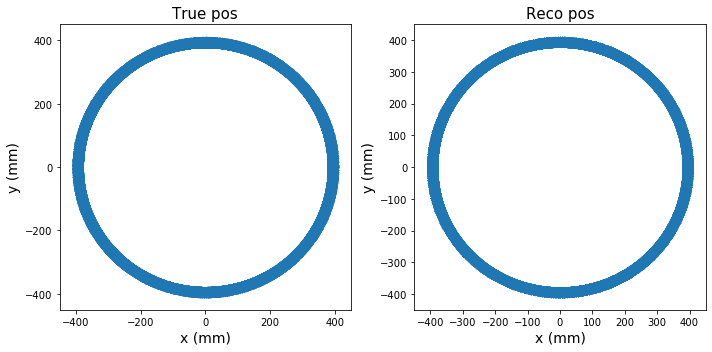

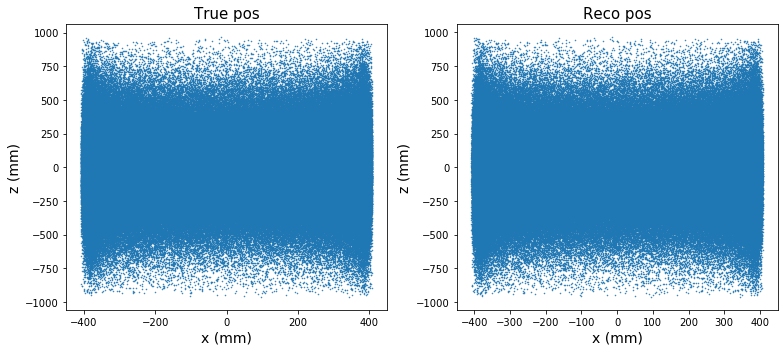

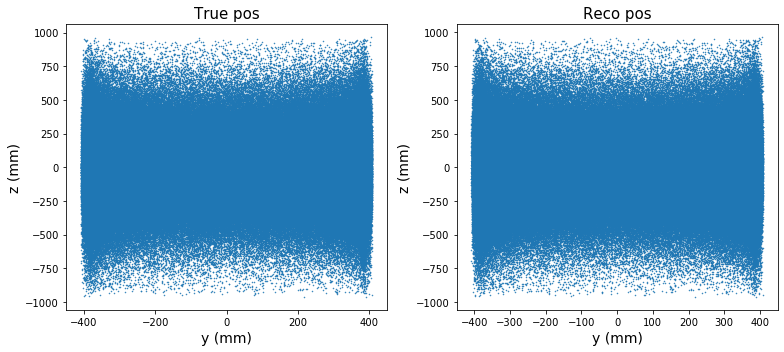

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(true_x, true_y, '.', markersize=1)
ax1.set_title('True pos', size=15)
ax1.set_xlabel('x (mm)', size=14)
ax1.set_ylabel('y (mm)', size=14)

ax2.set_title('Reco pos', size=15)
ax2.plot(reco_x, reco_y, '.', markersize=1)
ax2.set_xlabel('x (mm)', size=14)
ax2.set_ylabel('y (mm)', size=14)
plt.tight_layout()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
ax1.plot(true_x, true_z, '.', markersize=1)
ax1.set_title('True pos', size=15)
ax1.set_xlabel('x (mm)', size=14)
ax1.set_ylabel('z (mm)', size=14)

ax2.set_title('Reco pos', size=15)
ax2.plot(reco_x, reco_z, '.', markersize=1)
ax2.set_xlabel('x (mm)', size=14)
ax2.set_ylabel('z (mm)', size=14)
plt.tight_layout()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
ax1.plot(true_y, true_z, '.', markersize=1)
ax1.set_title('True pos', size=15)
ax1.set_xlabel('y (mm)', size=14)
ax1.set_ylabel('z (mm)', size=14)

ax2.set_title('Reco pos', size=15)
ax2.plot(reco_y, reco_z, '.', markersize=1)
ax2.set_xlabel('y (mm)', size=14)
ax2.set_ylabel('z (mm)', size=14)

plt.tight_layout();

3


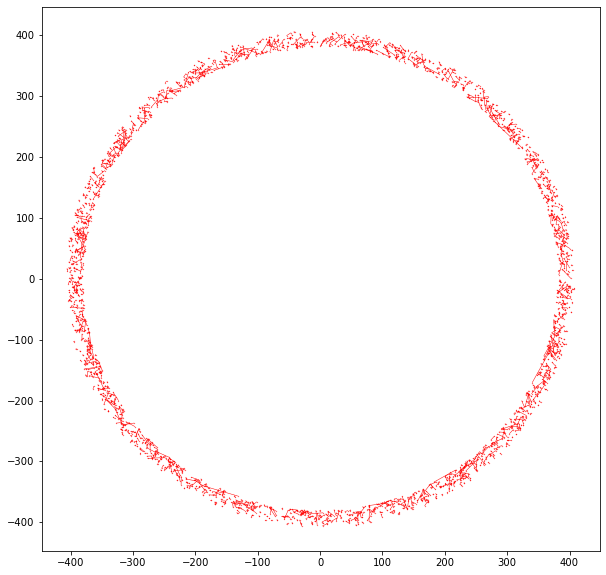

In [6]:
out = 0
plt.figure(figsize=(10,10))
for (tx1, ty1, rx1, ry1) in zip(true_x1[:2000], true_y1[:2000], reco_x1[:2000], reco_y1[:2000]):
    xs = np.array([tx1, rx1])
    ys = np.array([ty1, ry1])
    dist = np.sqrt((tx1-rx1)**2 + (ty1-ry1)**2)
    if dist > 50:
        out += 1
    plt.plot(xs, ys, '.', markersize=0.5, linestyle='-', linewidth=0.5, c='r')
print(out)

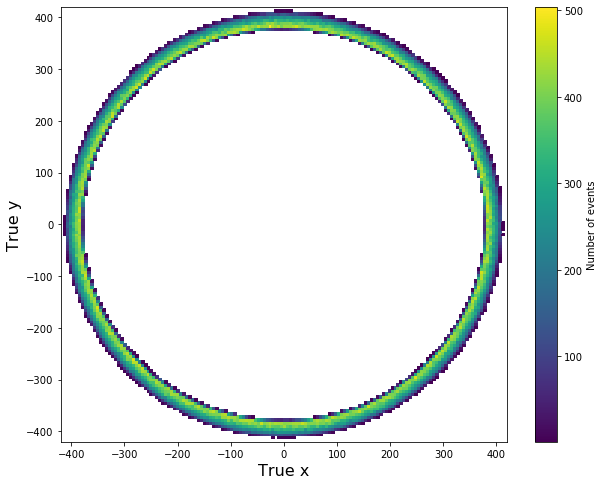

In [7]:
plt.rcParams["figure.figsize"] = (10,8)
ranges_xy = (-420, 420)
plt.hist2d(true_x, true_y, bins=(150, 150), range=(ranges_xy, ranges_xy), cmin=1)
plt.xlabel('True x', size=16)
plt.ylabel('True y', size=16)
plt.colorbar().set_label("Number of events")
plt.show()

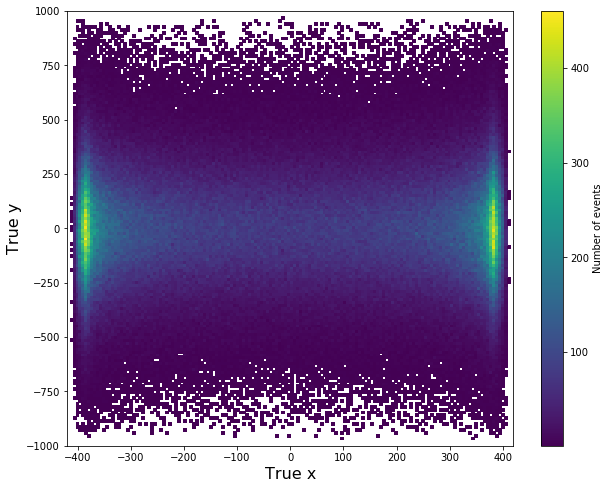

In [8]:
plt.rcParams["figure.figsize"] = (10,8)
ranges_z = (-1000, 1000)
plt.hist2d(true_x, true_z, bins=(150, 150), range=(ranges_xy, ranges_z), cmin=1)
plt.xlabel('True x', size=16)
plt.ylabel('True y', size=16)
plt.colorbar().set_label("Number of events")
plt.show()

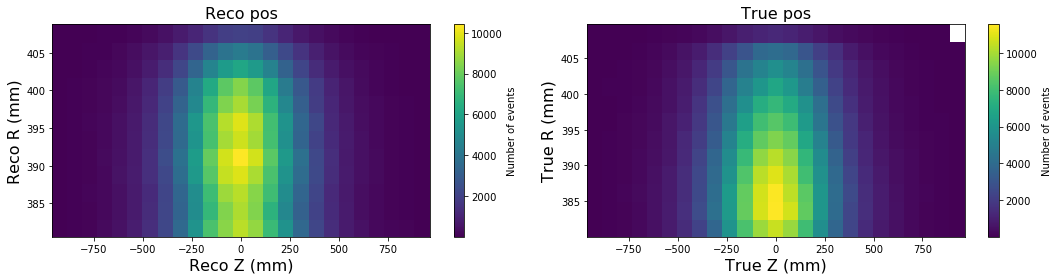

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,4))
zbins, rbins = 25, 12

h1 = ax1.hist2d(reco_z, reco_r, (zbins, rbins), cmin=1)
h2 = ax2.hist2d(true_z, true_r, (zbins, rbins), cmin=1)

ax1.set_xlabel('Reco Z (mm)', size=16)
ax1.set_ylabel('Reco R (mm)', size=16)
ax1.set_title('Reco pos', size=16)

ax2.set_xlabel('True Z (mm)', size=16)
ax2.set_ylabel('True R (mm)', size=16)
ax2.set_title('True pos', size=16)

cbar1 = plt.colorbar(h1[3], ax=ax1)
cbar1.set_label('Number of events')
cbar2 = plt.colorbar(h2[3], ax=ax2)
cbar2.set_label('Number of events')

plt.tight_layout()

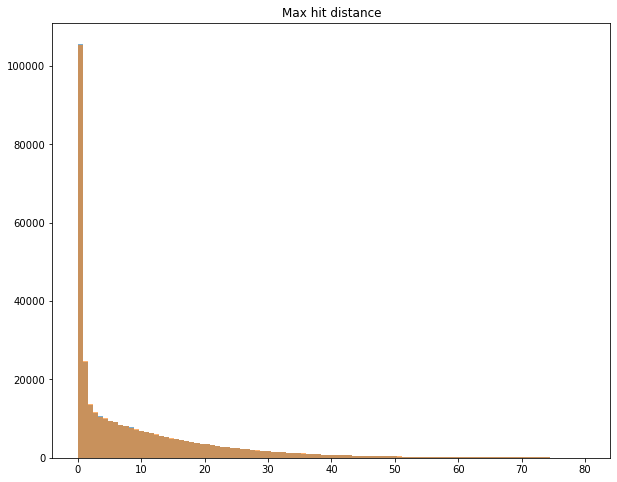

In [10]:
plt.hist(max_hit_distance1, 100, (0,80), alpha=0.6)
plt.hist(max_hit_distance2, 100, (0,80), alpha=0.6)
plt.title('Max hit distance');

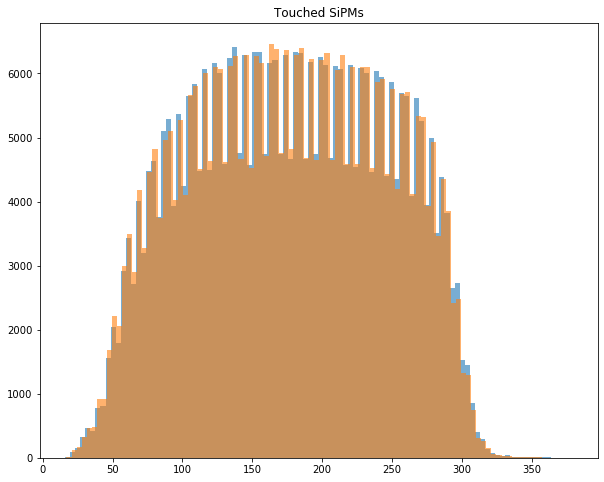

In [11]:
plt.hist(touched_sipms1, 100, alpha=0.6)
plt.hist(touched_sipms2, 100, alpha=0.6)
plt.title('Touched SiPMs');

## Time

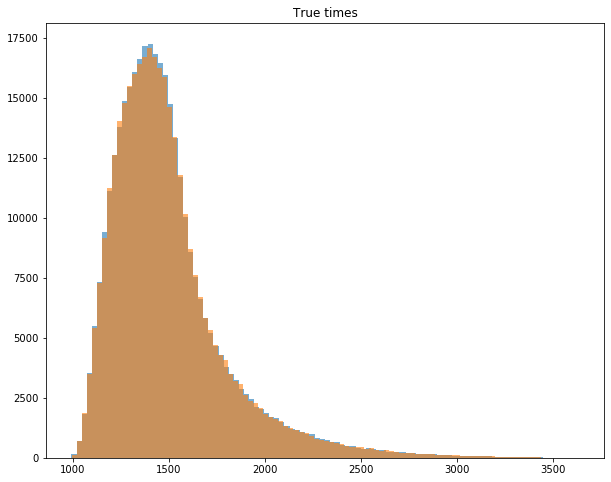

In [12]:
plt.hist(true_time1, 100, alpha=0.6)
plt.hist(true_time2, 100, alpha=0.6)
plt.title('True times');

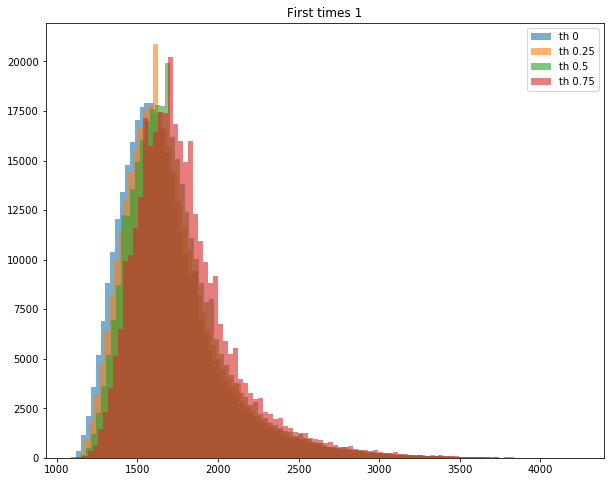

In [13]:
plt.hist(first_time1_1, 100, alpha=0.6, label=f'th {timestamp_thr[0]}')
plt.hist(first_time1_2, 100, alpha=0.6, label=f'th {timestamp_thr[1]}')
plt.hist(first_time1_3, 100, alpha=0.6, label=f'th {timestamp_thr[2]}')
plt.hist(first_time1_4, 100, alpha=0.6, label=f'th {timestamp_thr[3]}')
plt.title('First times 1')
plt.legend();

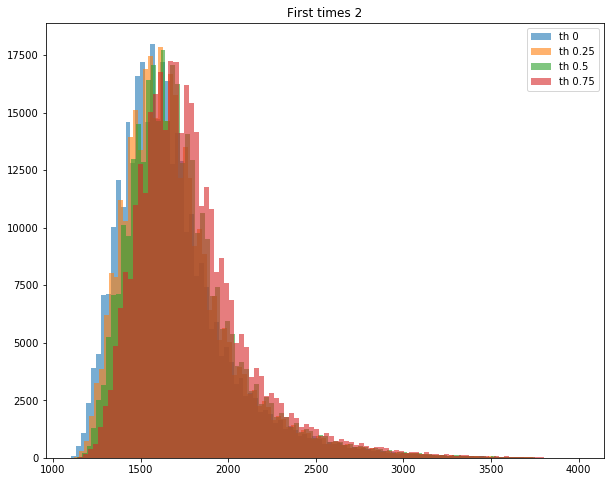

In [14]:
plt.hist(first_time2_1, 100, alpha=0.6, label=f'th {timestamp_thr[0]}')
plt.hist(first_time2_2, 100, alpha=0.6, label=f'th {timestamp_thr[1]}')
plt.hist(first_time2_3, 100, alpha=0.6, label=f'th {timestamp_thr[2]}')
plt.hist(first_time2_4, 100, alpha=0.6, label=f'th {timestamp_thr[3]}')
plt.title('First times 2')
plt.legend();

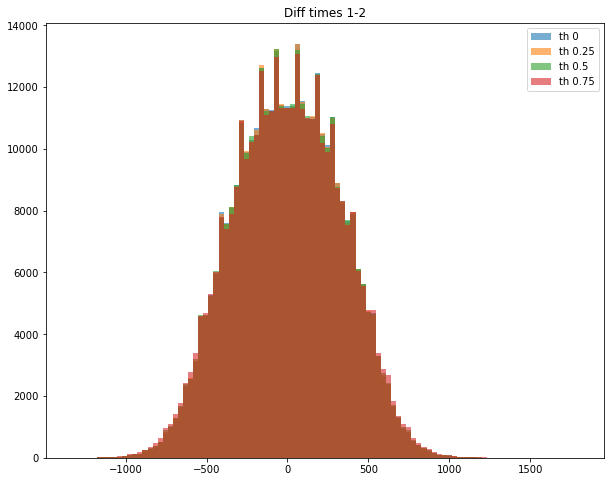

In [16]:
plt.hist(first_time1_1 - first_time2_1, 100, alpha=0.6, label=f'th {timestamp_thr[0]}')
plt.hist(first_time1_2 - first_time2_2, 100, alpha=0.6, label=f'th {timestamp_thr[1]}')
plt.hist(first_time1_3 - first_time2_3, 100, alpha=0.6, label=f'th {timestamp_thr[2]}')
plt.hist(first_time1_4 - first_time2_4, 100, alpha=0.6, label=f'th {timestamp_thr[3]}')
plt.title('Diff times 1-2')
plt.legend();

### Charge

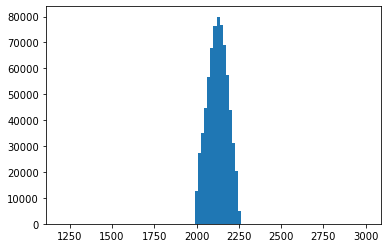

In [17]:
plt.rcParams["figure.figsize"] = (6,4)
plt.hist(sns_response, 100, (1200, 3000));

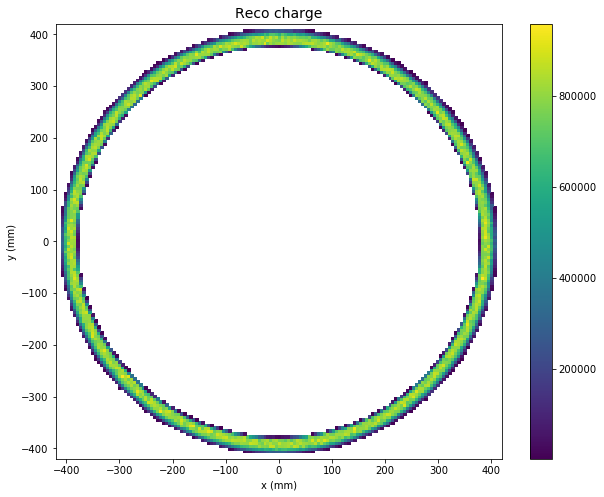

In [18]:
plt.rcParams["figure.figsize"] = (10,8)
xbins, ybins = 150, 150
plt.hist2d(reco_x, reco_y, weights=sns_response, bins=(xbins, ybins), range=(ranges_xy, ranges_xy), cmin=1)
plt.title('Reco charge', fontsize=14)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.colorbar();

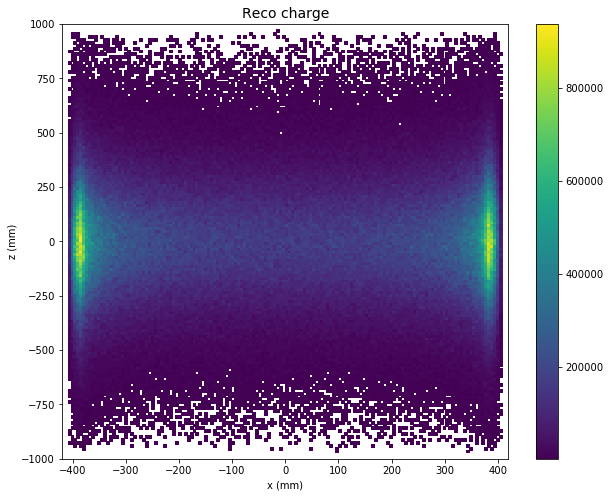

In [19]:
plt.rcParams["figure.figsize"] = (10,8)
plt.hist2d(reco_x, reco_z, weights=sns_response, bins=(xbins, ybins), range=(ranges_xy, ranges_z), cmin=1)
plt.title('Reco charge', fontsize=14)
plt.xlabel('x (mm)')
plt.ylabel('z (mm)')
plt.colorbar();

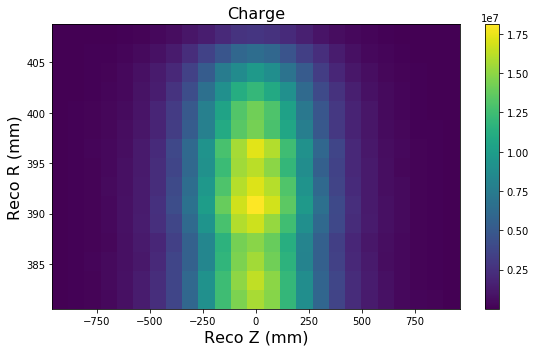

In [20]:
zbins, rbins = 25, 15

plt.rcParams["figure.figsize"] = (8,5)

h1 = plt.hist2d(reco_z, reco_r, weights=sns_response, bins=(zbins, rbins), cmin=1)

plt.xlabel('Reco Z (mm)', size=16)
plt.ylabel('Reco R (mm)', size=16)
plt.title('Charge', size=16)

plt.colorbar()

plt.tight_layout()

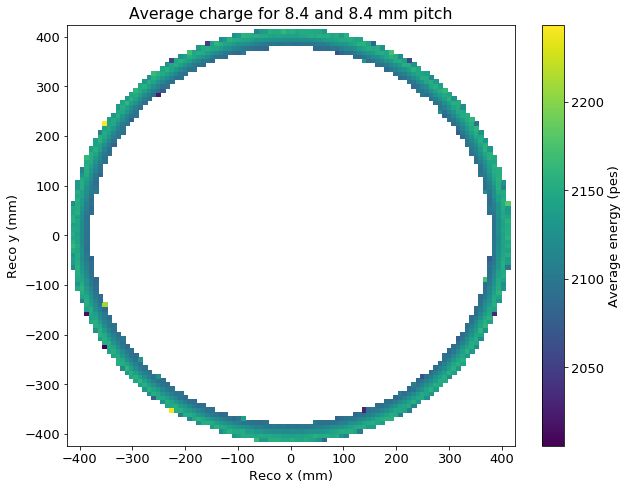

In [23]:
#fig = plt.figure(figsize=(8, 14))
xbins, ybins = 100, 100

Xbins    = np.linspace(*ranges_xy, xbins + 1)
Xcenters = shift_to_bin_centers(Xbins)
Xpitch   = np.diff(Xbins)[0]
Ybins    = np.linspace(*ranges_xy, ybins + 1)
Ycenters = shift_to_bin_centers(Ybins)
Ypitch   = np.diff(Ybins)[0]

plt.rcParams["figure.figsize"] = (9,7)
plt.rcParams[  "font.size"   ] = 13

*_, Eave, Eaveu = fitf.profileXY(reco_x, reco_y, sns_response, xbins, ybins, ranges_xy, ranges_xy)

Eok = Eave > 0.

E_mean  = np.mean(Eave[Eok])
E_std   = np.std (Eave[Eok])

E_min   = E_mean - 3.0 * E_std
E_max   = E_mean + 2.0 * E_std

*_, cb = display_matrix(Xcenters, Ycenters, Eave,
#                        vmin = E_min,
#                        vmax = E_max,
                        cmap = 'viridis',
                        new_figure = True,
                        cmin=1)
cb.set_label("Average energy (pes)")
plt.xlabel('Reco x (mm)')
plt.ylabel('Reco y (mm)')
plt.title(f'Average charge for {Xpitch:.1f} and {Ypitch:.1f} mm pitch')

plt.tight_layout()

In [22]:
def create_new_figure(kwargs):
    if kwargs.setdefault("new_figure", True):
        plt.figure()
    del kwargs["new_figure"]
    
def hist2d(*args, **kwargs):
    """
    Create a figure and then the histogram
    """
    create_new_figure(kwargs)

    z, x, y, p = plt.hist2d(*args, **kwargs)
    return z, shift_to_bin_centers(x), shift_to_bin_centers(y), p

def display_matrix(x, y, z, mask=None, **kwargs):
    """
    Display the matrix z using the coordinates x and y as the bin centers.
    """
    nx = np.size(x)
    ny = np.size(y)

    dx = (np.max(x) - np.min(x)) / nx
    dy = (np.max(y) - np.min(y)) / ny

    x_binning = np.linspace(np.min(x) - dx, np.max(x) + dx, nx + 1)
    y_binning = np.linspace(np.min(y) - dy, np.max(y) + dy, ny + 1)

    x_ = np.repeat(x, ny)
    y_ = np.tile  (y, nx)
    z_ = z.flatten()

    if mask is None:
        mask = np.ones_like(z_, dtype=bool)
    h = hist2d(x_[mask], y_[mask], (x_binning,
                                     y_binning),
                weights = z_[mask],
                **kwargs)
    return h, plt.colorbar()